importing the data to begin and setting relative paths.

In [8]:
import pandas as pd
import os

# Get the current working directory of the notebook (where the notebook is located)
current_dir = os.getcwd()

# Define the relative path to the CSV file based on the structure within your repository
data_path = os.path.join(current_dir, '..', 'raw', 'breast.csv')

# Load the dataset into a pandas DataFrame
df = pd.read_csv(data_path)

# Display the first few rows to inspect the data
df.head()

,ID,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Now we begin cleaning the data for future analysis

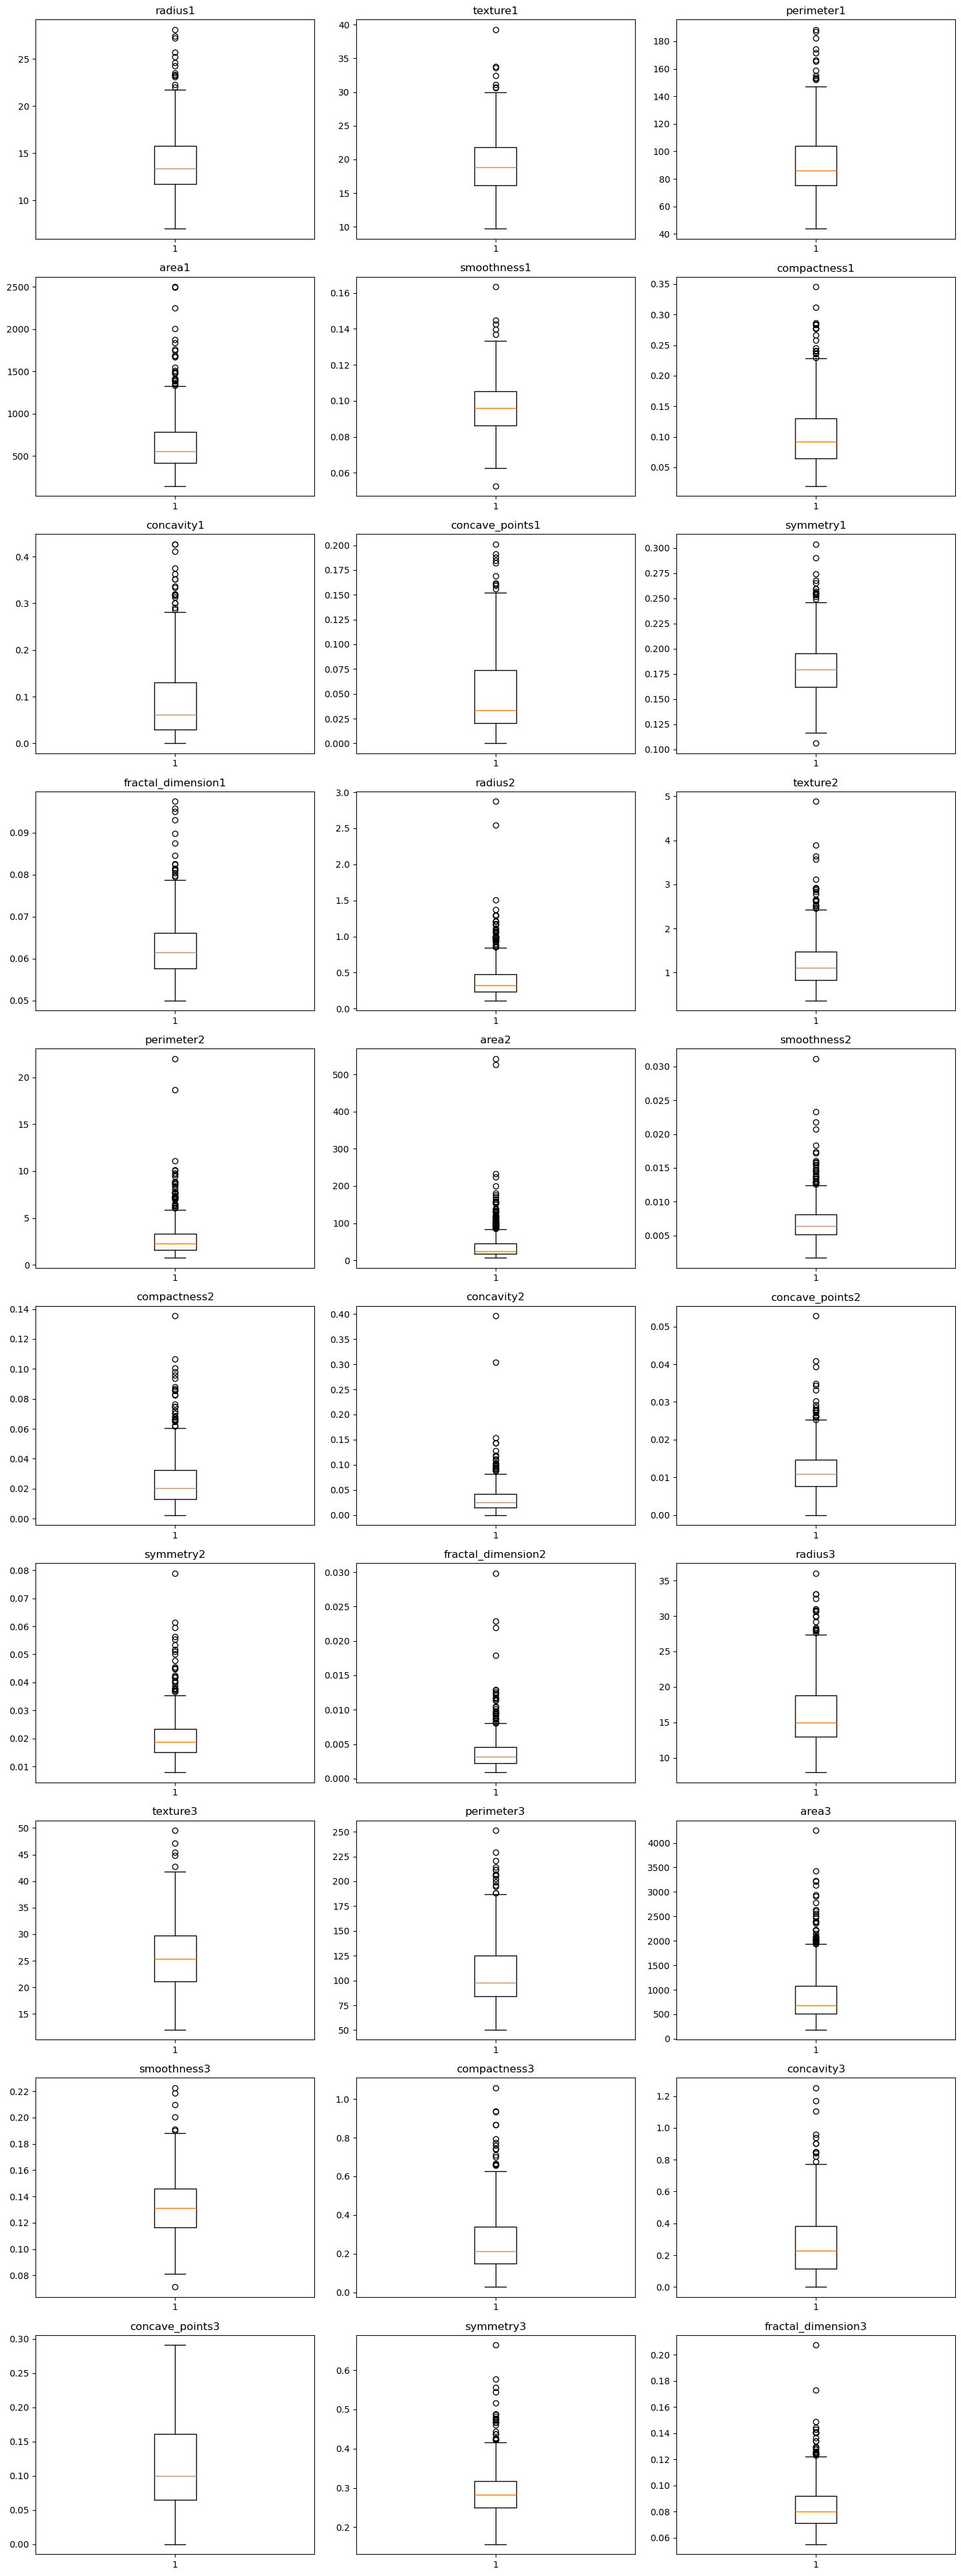

,Feature,Outlier_Count_ZScore,Outlier_Count_IQR,Missing_Data
radius1,radius1,5,14,0
texture1,texture1,4,7,0
perimeter1,perimeter1,7,13,0
area1,area1,8,25,0
smoothness1,smoothness1,5,6,0
compactness1,compactness1,9,16,0
concavity1,concavity1,9,18,0
concave_points1,concave_points1,6,10,0
symmetry1,symmetry1,5,15,0
fractal_dimension1,fractal_dimension1,7,15,0


In [20]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

# Step 1: Check for Missing Values
missing_values = df.isnull().sum()[2:]

# Step 2: Conduct two Outlier Detection Methods, 1:Z-Score and 2:IQR

# Method 1: Z-score Analysis
z_scores = np.abs(stats.zscore(df.iloc[:, 2:]))  # Only considering features, ignoring 'ID' and 'Diagnosis'
threshold = 3  # Typically used threshold for Z-score

# Identify features and their corresponding outlier counts based on Z-scores
outlier_counts_zscore = (z_scores > threshold).sum(axis=0)

# Method 2: IQR Method for Outlier Detection
Q1 = df.iloc[:, 2:].quantile(0.25)
Q3 = df.iloc[:, 2:].quantile(0.75)
IQR = Q3 - Q1

# Identifying outliers using the IQR method
outliers_iqr = ((df.iloc[:, 2:] < (Q1 - 1.5 * IQR)) | (df.iloc[:, 2:] > (Q3 + 1.5 * IQR))).sum()

# Method 3: Visualizing Outliers with Boxplots for Each Feature
plt.figure(figsize=(15, 40))
for i, column in enumerate(df.columns[2:], 1):  # Ignoring 'ID' and 'Diagnosis' columns
    plt.subplot(10, 3, i)
    plt.boxplot(df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

# Summary of missing values and outliers
outlier_summary = pd.DataFrame({
    'Feature': df.columns[2:],
    'Outlier_Count_ZScore': outlier_counts_zscore,
    'Outlier_Count_IQR': outliers_iqr,
    'Missing_Data': missing_values.values  # adds column to dataframe with missing data count.
})

# Display the summary of missing values and outliers
outlier_summary


we can see many outliers in the data. Filtering for top outliers (>10 outliers).

In [22]:
# Filtering features with a high count of outliers based on Z-scores (>10 outliers as a threshold for example)
zscore_outlier_features = outlier_summary[outlier_summary['Outlier_Count_ZScore'] > 10]['Feature'].tolist()

# Filtering features with a high count of outliers based on the IQR method (>10 outliers as a threshold)
iqr_outlier_features = outlier_summary[outlier_summary['Outlier_Count_IQR'] > 10]['Feature'].tolist()

# Find features that are flagged as having high outliers by both Z-score and IQR methods
common_outlier_features = set(zscore_outlier_features).intersection(iqr_outlier_features)

# Display the features with high outliers for both methods
high_outlier_summary = outlier_summary[(outlier_summary['Feature'].isin(zscore_outlier_features)) | 
                                       (outlier_summary['Feature'].isin(iqr_outlier_features))]

# Display the filtered summary of high-impact outlier features
high_outlier_summary


,Feature,Outlier_Count_ZScore,Outlier_Count_IQR,Missing_Data
radius1,radius1,5,14,0
perimeter1,perimeter1,7,13,0
area1,area1,8,25,0
compactness1,compactness1,9,16,0
concavity1,concavity1,9,18,0
symmetry1,symmetry1,5,15,0
fractal_dimension1,fractal_dimension1,7,15,0
radius2,radius2,7,38,0
texture2,texture2,9,20,0
perimeter2,perimeter2,8,38,0
